###Actividad Fundamental 3
###José Antonio Martínez Calan
###2127803

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def rectificar_imagen(imagen_path, puntos_distorsionados, tamaño_salida):
    """Rectificar imagen con transformación homográfica"""
    imagen = cv2.imread(imagen_path)
    if imagen is None:
        print(f"Error: No se pudo cargar {imagen_path}")
        return None

    # Puntos de destino (rectángulo perfecto)
    puntos_destino = np.array([
        [0, 0],
        [tamaño_salida[0]-1, 0],
        [0, tamaño_salida[1]-1],
        [tamaño_salida[0]-1, tamaño_salida[1]-1]
    ], dtype=np.float32)

    # Calcular matriz homográfica
    H, mask = cv2.findHomography(puntos_distorsionados, puntos_destino)

    # Aplicar transformación
    imagen_rectificada = cv2.warpPerspective(imagen, H, tamaño_salida)

    return imagen_rectificada

In [7]:
def mostrar_resultados(original, rectificada, titulo_original, titulo_rectificada):
    """Mostrar comparación"""
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(titulo_original, fontweight='bold')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(rectificada, cv2.COLOR_BGR2RGB))
    plt.title(titulo_rectificada, fontweight='bold')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

AVE 1 - Coordenadas exactas

In [8]:
puntos_ave1 = np.array([
    [200, 0],     # Superior izquierda (x,y)
    [1800, 350],  # Superior derecha
    [0, 1500],    # Inferior izquierda
    [2000, 1150]  # Inferior derecha
], dtype=np.float32)

AVE 2 - Coordenadas exactas

In [9]:
puntos_ave2 = np.array([
    [0, 0],       # Superior izquierda (x,y)
    [2000, 350],  # Superior derecha
    [0, 1500],    # Inferior izquierda
    [1800, 950]   # Inferior derecha
], dtype=np.float32)

AVE 3 - Coordenadas exactas

In [10]:
puntos_ave3 = np.array([
    [0, 0],       # Superior izquierda (x,y)
    [1800, 350],  # Superior derecha
    [0, 1500],    # Inferior izquierda
    [2000, 1150]  # Inferior derecha CORREGIDO
], dtype=np.float32)

PROCESAR AVES CON COORDENADAS EXACTAS

PROCESANDO AVES CON COORDENADAS EXACTAS


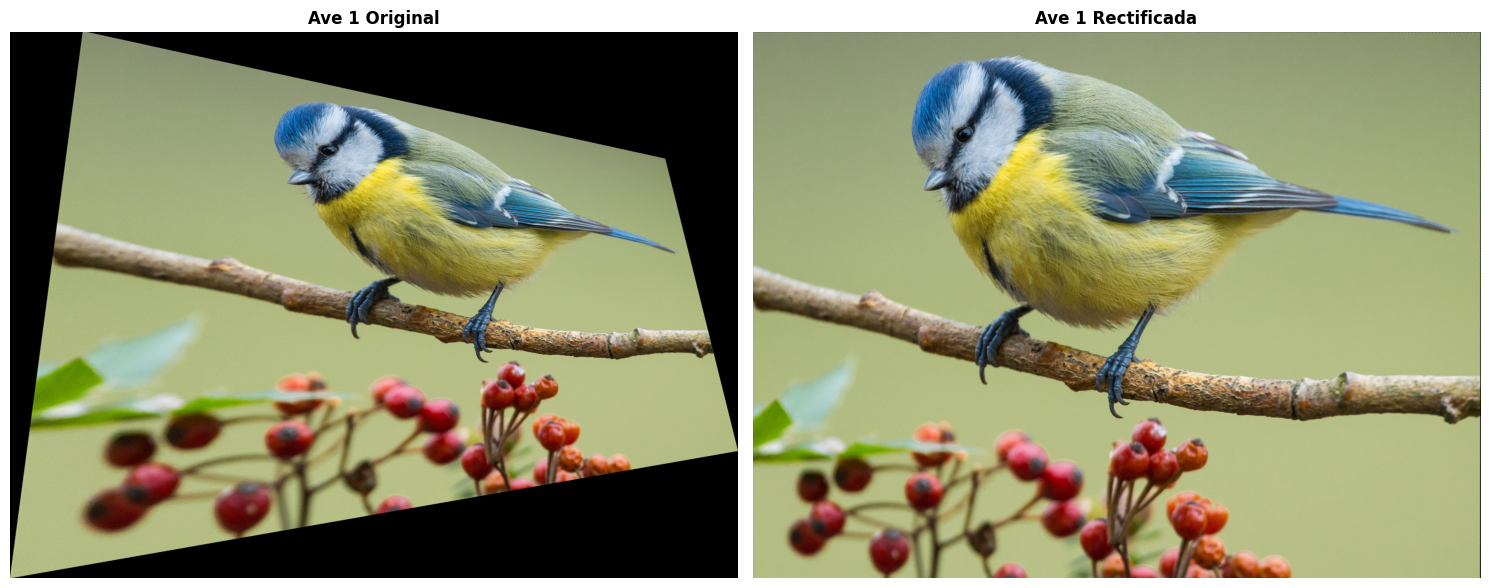

✓ Ave 1 procesada correctamente


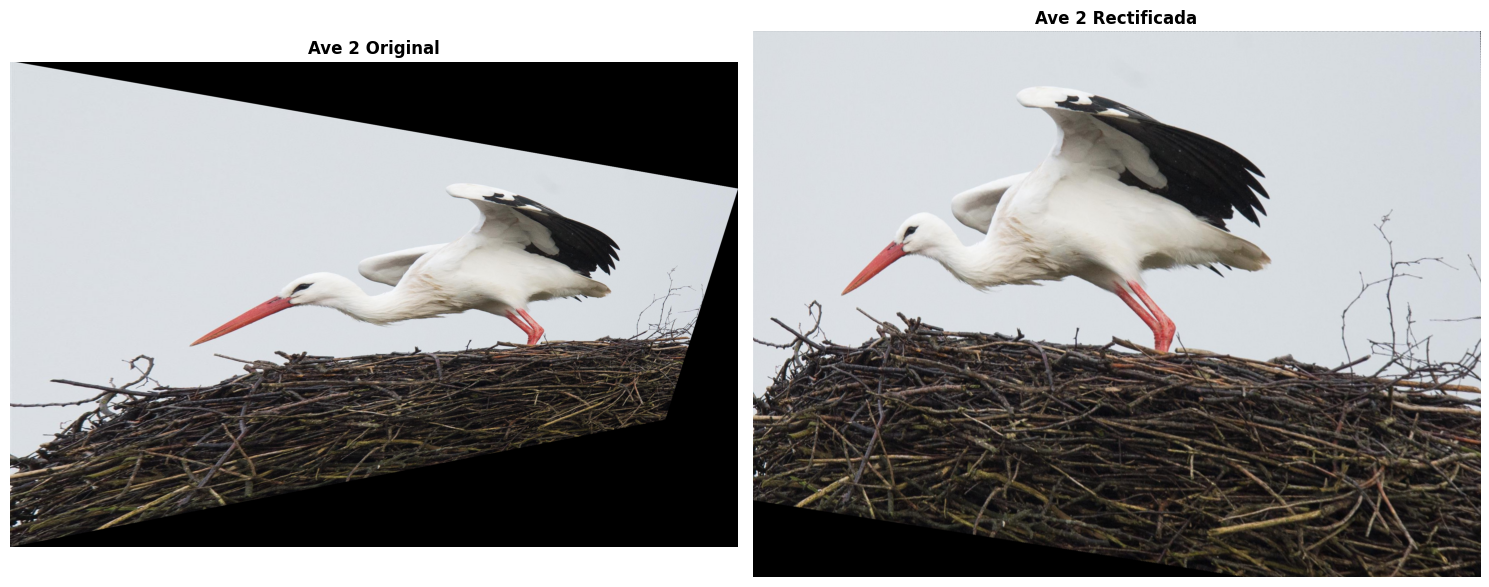

✓ Ave 2 procesada correctamente


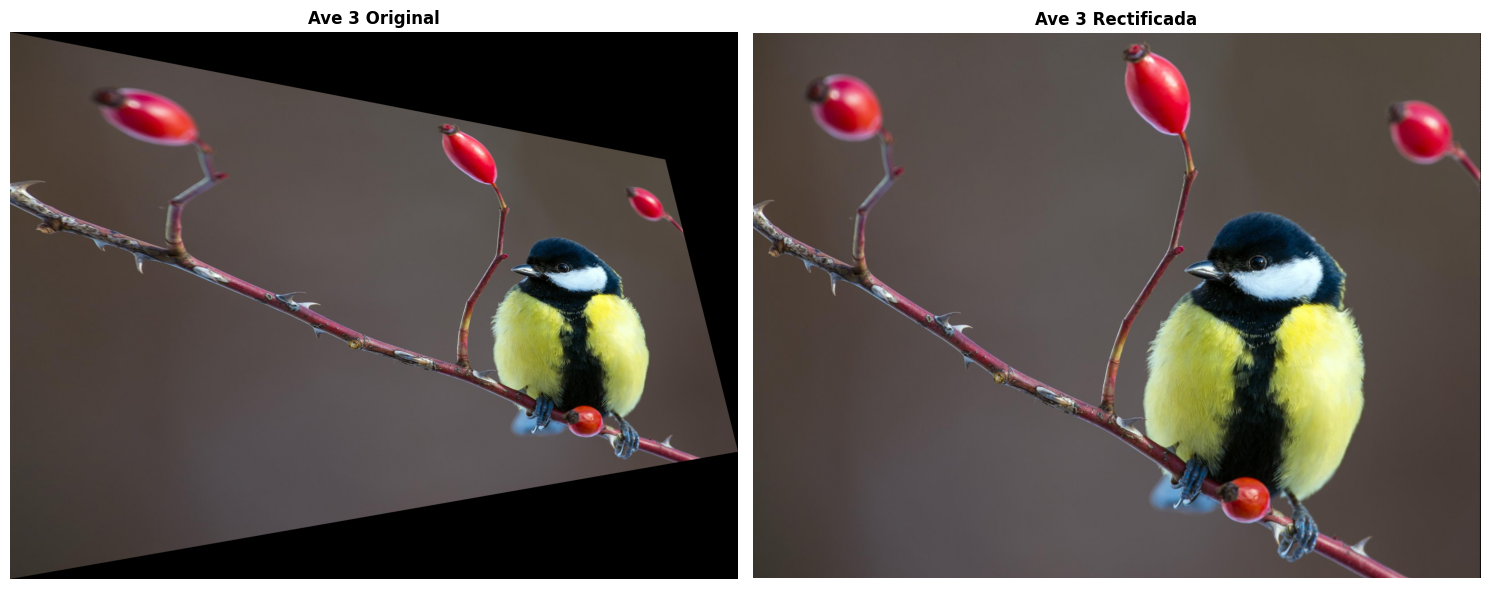

✓ Ave 3 procesada correctamente


In [11]:
print("PROCESANDO AVES CON COORDENADAS EXACTAS")
print("=" * 50)

# Procesar AVE 1
imagen_ave1 = cv2.imread('ave1_d.png')
if imagen_ave1 is not None:
    rectificada_ave1 = rectificar_imagen('ave1_d.png', puntos_ave1, (2000, 1500))
    if rectificada_ave1 is not None:
        mostrar_resultados(imagen_ave1, rectificada_ave1, "Ave 1 Original", "Ave 1 Rectificada")
        cv2.imwrite('ave1_rectificada.png', rectificada_ave1)
        print("✓ Ave 1 procesada correctamente")

# Procesar AVE 2
imagen_ave2 = cv2.imread('ave2_d.png')
if imagen_ave2 is not None:
    rectificada_ave2 = rectificar_imagen('ave2_d.png', puntos_ave2, (2000, 1500))
    if rectificada_ave2 is not None:
        mostrar_resultados(imagen_ave2, rectificada_ave2, "Ave 2 Original", "Ave 2 Rectificada")
        cv2.imwrite('ave2_rectificada.png', rectificada_ave2)
        print("✓ Ave 2 procesada correctamente")

# Procesar AVE 3
imagen_ave3 = cv2.imread('ave3_d.png')
if imagen_ave3 is not None:
    rectificada_ave3 = rectificar_imagen('ave3_d.png', puntos_ave3, (2000, 1500))
    if rectificada_ave3 is not None:
        mostrar_resultados(imagen_ave3, rectificada_ave3, "Ave 3 Original", "Ave 3 Rectificada")
        cv2.imwrite('ave3_rectificada.png', rectificada_ave3)
        print("✓ Ave 3 procesada correctamente")

PROCESAR FOTO DE PORTADA


PROCESANDO FOTO DE PORTADA


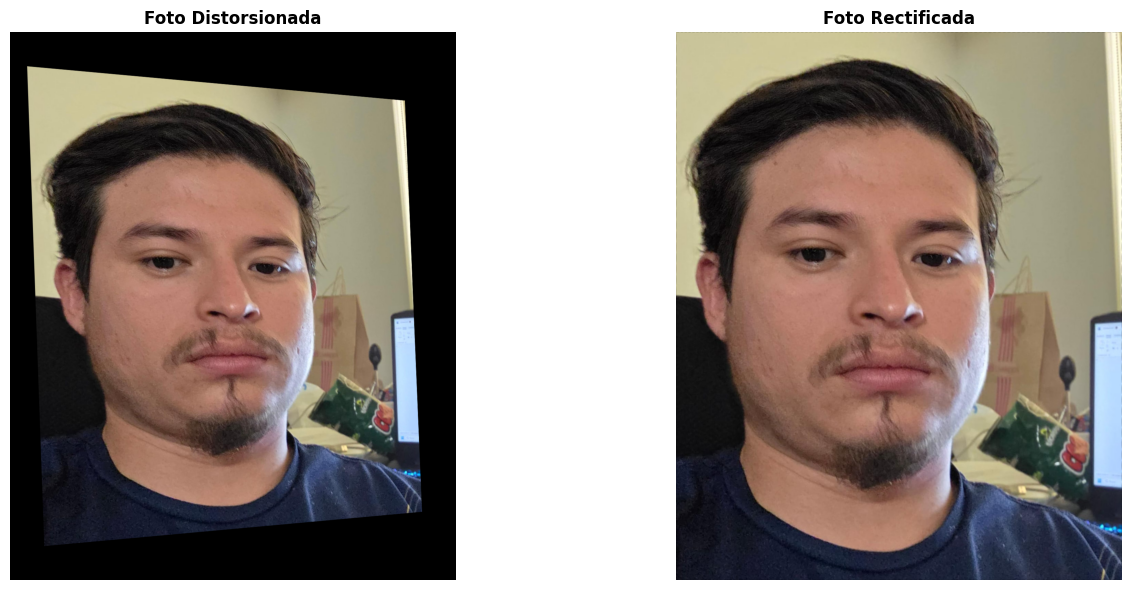

✓ Foto de portada procesada correctamente


In [13]:
def procesar_foto_portada():
    """Procesar foto de portada: distorsionar y rectificar"""
    print("\nPROCESANDO FOTO DE PORTADA")
    print("=" * 50)

    foto = cv2.imread('Foto.jpeg')
    if foto is None:
        print("Error: No se pudo cargar Foto.jpeg")
        return

    alto, ancho = foto.shape[:2]

    # 1. CREAR DISTORSIÓN
    puntos_originales = np.array([[0, 0], [ancho-1, 0],
                                [0, alto-1], [ancho-1, alto-1]], dtype=np.float32)

    # Crear distorsión de perspectiva
    puntos_distorsionados = np.array([
        [50, 100],           # Superior izquierda
        [ancho-150, 200],    # Superior derecha
        [100, alto-100],     # Inferior izquierda
        [ancho-100, alto-200] # Inferior derecha
    ], dtype=np.float32)

    H_distorsion = cv2.getPerspectiveTransform(puntos_originales, puntos_distorsionados)
    foto_distorsionada = cv2.warpPerspective(foto, H_distorsion, (ancho, alto))
    cv2.imwrite('Foto_distorsionada.jpg', foto_distorsionada)

    # 2. RECTIFICAR
    puntos_destino = np.array([[0, 0], [ancho-1, 0],
                             [0, alto-1], [ancho-1, alto-1]], dtype=np.float32)

    H_rectificacion, mask = cv2.findHomography(puntos_distorsionados, puntos_destino)
    foto_rectificada = cv2.warpPerspective(foto_distorsionada, H_rectificacion, (ancho, alto))

    # Mostrar resultados
    mostrar_resultados(foto_distorsionada, foto_rectificada,
                     "Foto Distorsionada", "Foto Rectificada")
    cv2.imwrite('Foto_rectificada.jpg', foto_rectificada)
    print("✓ Foto de portada procesada correctamente")

# Procesar foto de portada
procesar_foto_portada()

